# Datalab 1
In this datalab, we will focus on summarizing and visualizing data. Before we start, we load all the necessary packages. We use NumPy and pandas for data handling, and pyplot in Matplotlib, and seaborn for creating nice-looking visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load data
Run the following code to read the data from its csv file. 

In [2]:
gapminder = pd.read_csv(
    "https://raw.githubusercontent.com/holleland/TECH3/refs/heads/main/data/gapminder.csv"
)
gapminder = gapminder.loc[gapminder["year"]<2024,]

## Explore the data
Visuzaling and summarizing data is important in the initial step of any analysis: The exploratory part. Usually, when we get a new dataset we need to et to know the data. First we can look a bit at its structure. What are the variables in the dataset? 

In [3]:
# Let check out the first rows: 
gapminder.head()

,country,continent,year,pop,lifeExp,gdp_pcap
0,Afghanistan,Asia,1800.0,3280000.0,28.2,481.0
1,Afghanistan,Asia,1801.0,3280000.0,28.2,481.0
2,Afghanistan,Asia,1802.0,3280000.0,28.2,481.0
3,Afghanistan,Asia,1803.0,3280000.0,28.2,481.0
4,Afghanistan,Asia,1804.0,3280000.0,28.2,481.0


From the output, we see that the data consist of the following six columns: 

- country: Name of country. Character.
- continent: Name of continent. Character.
- year: Integer year.
- pop: Population size of country in the given year. Integer.
- lifeExp: Life expectancy (how old a person is expected to live). Numeric.
- gpd_pcap: Gross Domestic Product (GDP) per capita (per population size).

What is the range of the variable *year*?

In [4]:
print("Min year: ", gapminder["year"].min())
print("Max year: ", gapminder["year"].max())

Min year:  1800.0
Max year:  2023.0


In 2023, what is the average life expectancy? 

In [5]:
gap23 = gapminder.loc[gapminder["year"]==2023, ]
avgLifeExp = gap23["lifeExp"].mean()
print(avgLifeExp)
print(f"{avgLifeExp:.1f}") # print rounded value

73.26363636363637
73.3


Which country is the richect in terms of gross domestic product per capita (*gpd_pcap*) in 2023?

In [6]:
print(gap23.loc[gap23["gdp_pcap"].idxmax(),])

country        Ireland
continent       Europe
year            2023.0
pop          5200000.0
lifeExp           82.6
gdp_pcap      104000.0
Name: 18804, dtype: object


Which countries had the lowest and highest life expectacy in the earliest year?

In [7]:
gap1800 = gapminder.loc[gapminder["year"]==1800, ]
gap1800.loc[(gap1800["lifeExp"].idxmin(), gap1800["lifeExp"].idxmax()),]

,country,continent,year,pop,lifeExp,gdp_pcap
32431,Sierra Leone,Africa,1800.0,794000.0,25.1,829.0
17076,Iceland,Europe,1800.0,61400.0,42.9,1040.0


For each contitent, what is the highest life expectancy?

In [8]:
x = gap23.groupby("continent")["lifeExp"]
x.max()

continent
Africa      78.7
Americas    82.8
Asia        85.4
Europe      84.6
Oceania     83.5
Name: lifeExp, dtype: float64

### Task
Now, it is your turn. Let's focus on the year 2023. 

- What is the average life expectancy in 2023 for the various continents? (function mean)
- What is the corresponding standard deviation? (function: std)
- What is the minimum? (functions: min)
- What is the 5th and 95th percentile of gdp_pcap? (function: quantile)

In [9]:
# Write your code here: 
print("Average by", x.mean())
print("--------------")
print("Standard deviation by", x.std())
print("--------------")
print("Minimum by ", x.min())
print("--------------")
print("5 and 95 percentiles by ", x.quantile((0.05,0.95)))

Average by continent
Africa      65.890000
Americas    76.717391
Asia        75.525000
Europe      80.386207
Oceania     82.950000
Name: lifeExp, dtype: float64
--------------
Standard deviation by continent
Africa      5.345463
Americas    4.167804
Asia        5.249947
Europe      3.505682
Oceania     0.777817
Name: lifeExp, dtype: float64
--------------
Minimum by  continent
Africa      52.5
Americas    64.3
Asia        64.0
Europe      71.2
Oceania     82.4
Name: lifeExp, dtype: float64
--------------
5 and 95 percentiles by  continent      
Africa     0.05    59.115
           0.95    76.440
Americas   0.05    69.910
           0.95    81.090
Asia       0.05    67.345
           0.95    84.705
Europe     0.05    74.200
           0.95    84.280
Oceania    0.05    82.455
           0.95    83.445
Name: lifeExp, dtype: float64


## Visualization

Make a time plot of the median life expectancy per year across all countries. Is there a positive trend over time? Do you see anything around the following large global events?

- First world war (1914-1918)
- Spanish flu (1918-1920)
- Second world war (1939-1945)
- Covid-19 (2019-2021)

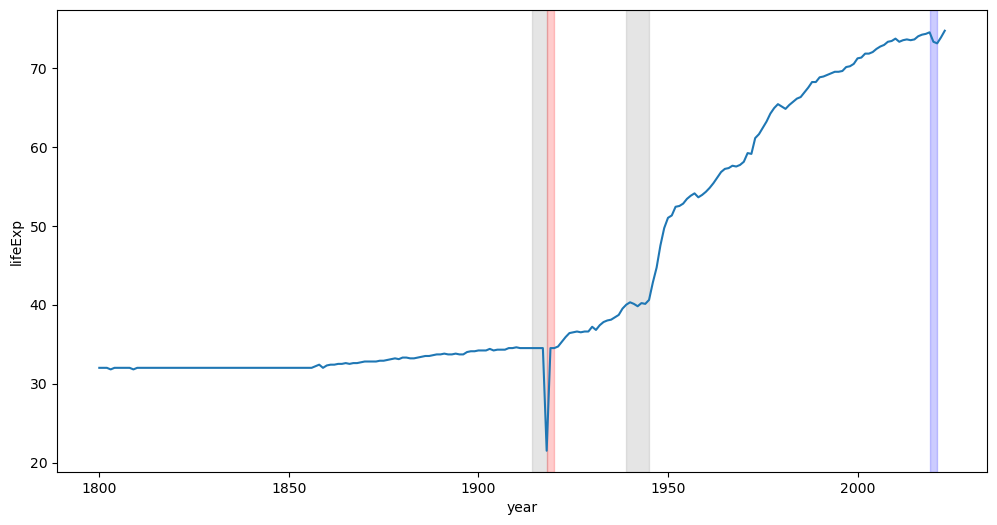

In [10]:
plt.figure(figsize=(12, 6))
med = gapminder.groupby("year")["lifeExp"].median().reset_index()
sns.lineplot(x="year", y = "lifeExp", data = med)
# Add shaded regions
plt.axvspan(1914, 1918, alpha=0.2, color="gray", label="WWI")
plt.axvspan(1918, 1920, alpha=0.2, color="red", label="Spanish flu")
plt.axvspan(1939, 1945, alpha=0.2, color="gray", label="WWII")
plt.axvspan(2019, 2021, alpha=0.2, color="blue", label="COVID-19")
plt.show()

**Comment:** We see a strong dip in life expectancy around world war 1, perhaps not so clear during the spanish flu. During WW-II, life expectancy seems to have a flat development (perhaps a slight decrease). We also see a dip during covid-19. 

Create a similar figure for GDP per capita.

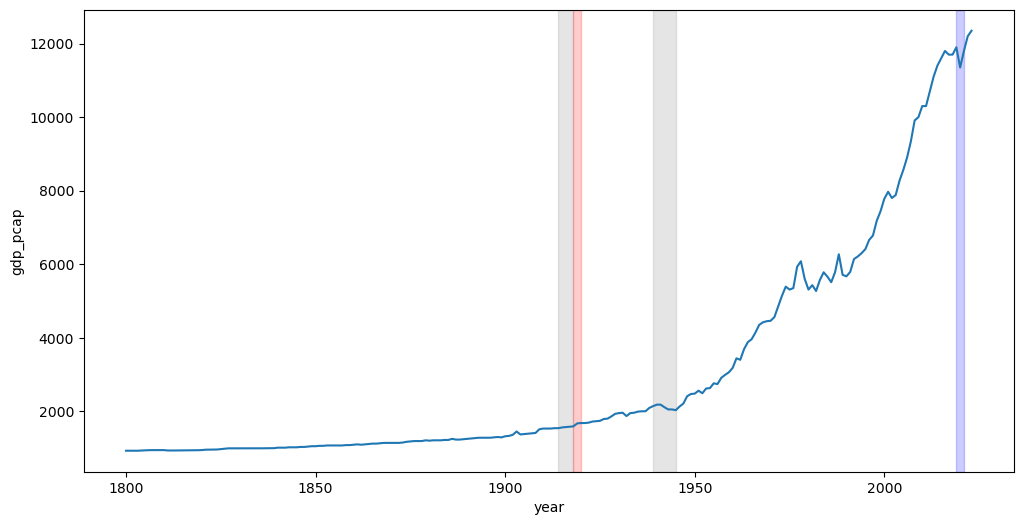

In [11]:
plt.figure(figsize=(12, 6))
med = gapminder.groupby("year")["gdp_pcap"].median().reset_index()
sns.lineplot(x="year", y = "gdp_pcap", data = med)
# Add shaded regions
plt.axvspan(1914, 1918, alpha=0.2, color="gray", label="WWI")
plt.axvspan(1918, 1920, alpha=0.2, color="red", label="Spanish flu")
plt.axvspan(1939, 1945, alpha=0.2, color="gray", label="WWII")
plt.axvspan(2019, 2021, alpha=0.2, color="blue", label="COVID-19")
plt.show()

**Comment:** The median GDP per capita has increased a lot during this period. In the figure it is not possible to see any strong negative effects of WW-I and the spanish flu, but we see a dip during WW-II and covid 19. 

Reproduce Rosling’s scatterplot: Make a scatterplot of the logarithmic GDP per capita (log(gdp_pcap)) and life expectancy (lifeExp), where the size of the bubble is given by the population size. Write your code such that you can easily switch between years.

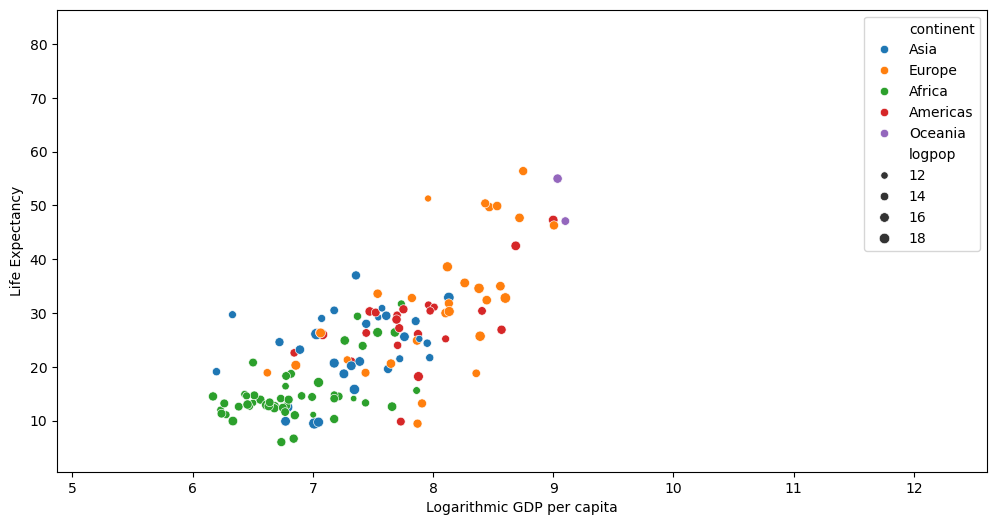

In [12]:
from matplotlib.colors import Normalize
plt.figure(figsize=(12, 6))
year = 1918
gapminder["loggdp"]=np.log(gapminder["gdp_pcap"])
gapminder["logpop"]=np.log(gapminder["pop"])
sns.scatterplot(x="loggdp", y = "lifeExp",
hue = "continent", size = "logpop",
data = gapminder.loc[gapminder["year"]==year,],
size_norm=Normalize(vmin=gapminder["logpop"].min(),
                    vmax=gapminder["logpop"].max()))
plt.xlabel("Logarithmic GDP per capita")
plt.ylabel("Life Expectancy")
plt.xlim(gapminder["loggdp"].min()-1, gapminder["loggdp"].max()+1)
plt.ylim(gapminder["lifeExp"].min()-1, gapminder["lifeExp"].max()+1)
plt.show()

Play with your figure. Can you detect drops in life expectancy around the mentioned large global events?

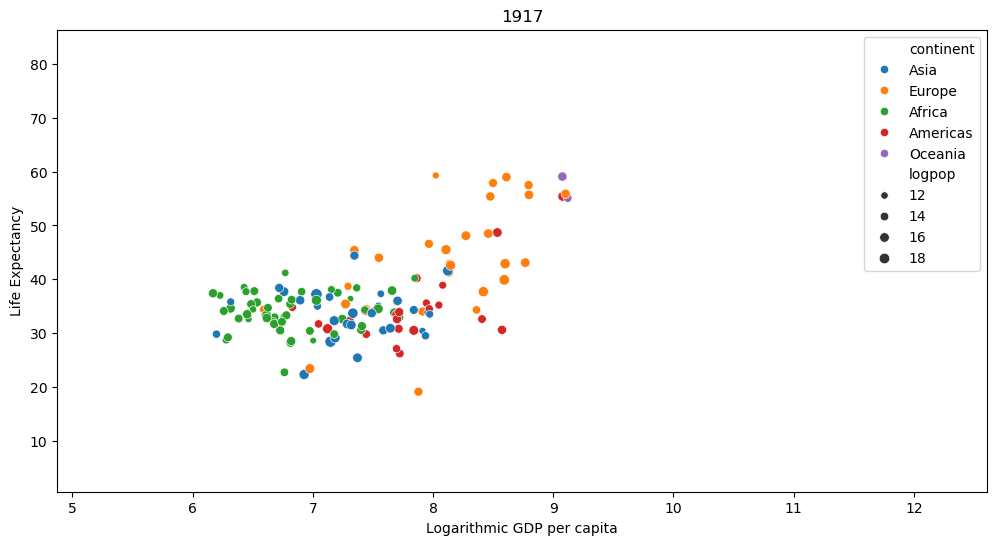

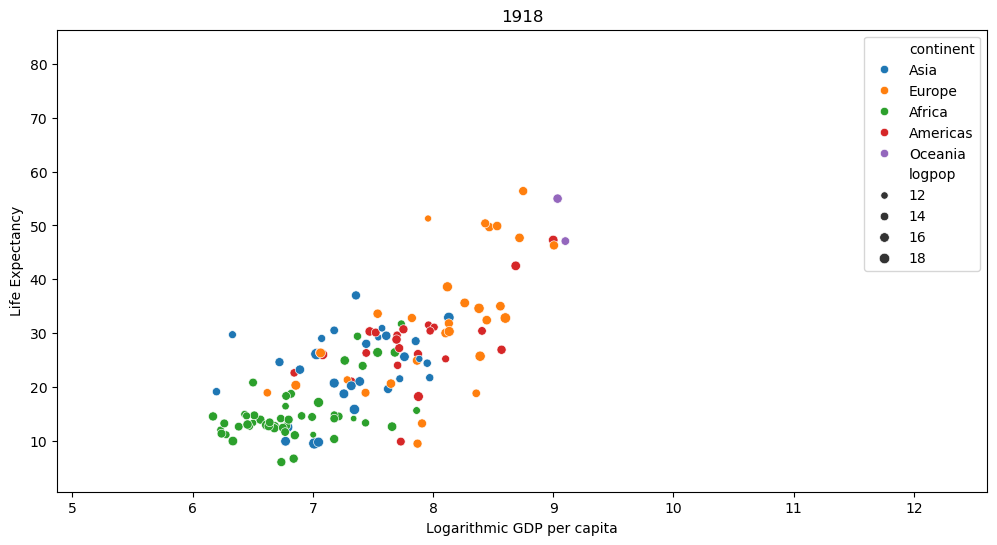

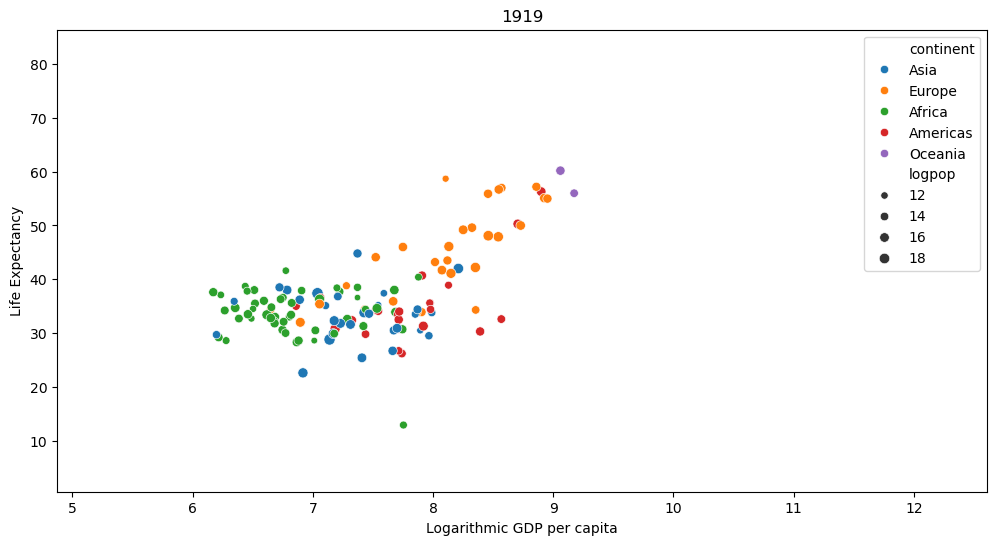

In [13]:
for year in range(1917,1920):
    plt.figure(figsize=(12, 6))
    gapminder["loggdp"]=np.log(gapminder["gdp_pcap"])
    gapminder["logpop"]=np.log(gapminder["pop"])
    sns.scatterplot(x="loggdp", y = "lifeExp",
    hue = "continent", size = "logpop",
    data = gapminder.loc[gapminder["year"]==year,],
    size_norm=Normalize(vmin=gapminder["logpop"].min(),
    vmax=gapminder["logpop"].max()))
    plt.xlabel("Logarithmic GDP per capita")
    plt.ylabel("Life Expectancy")
    plt.xlim(gapminder["loggdp"].min()-1, gapminder["loggdp"].max()+1)
    plt.ylim(gapminder["lifeExp"].min()-1, gapminder["lifeExp"].max()+1)
    plt.title(year)
    plt.show()

### Task

1. Make a box plot of life expectancy in 1918, with one box per contintent. Try change it to a violon plot. Which do you prefer?
2. Make a histogram of GDP_per_capita for 2023.
3. Make a bar plot showing how many countries are in each continent (use year 2023). Comment.
4. Make a bar plot showing the total population for each continent in 2023. Compare it the bar plot in 3 and comment.

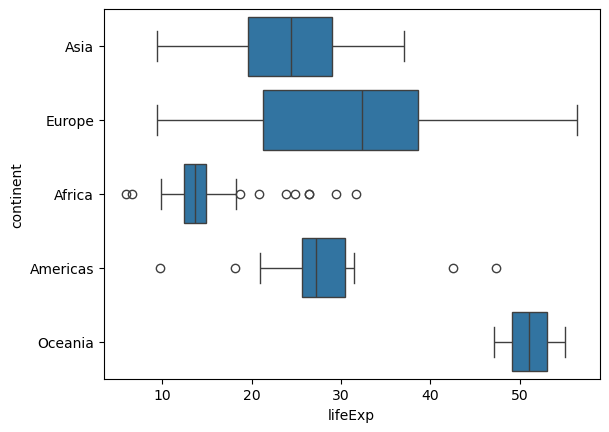

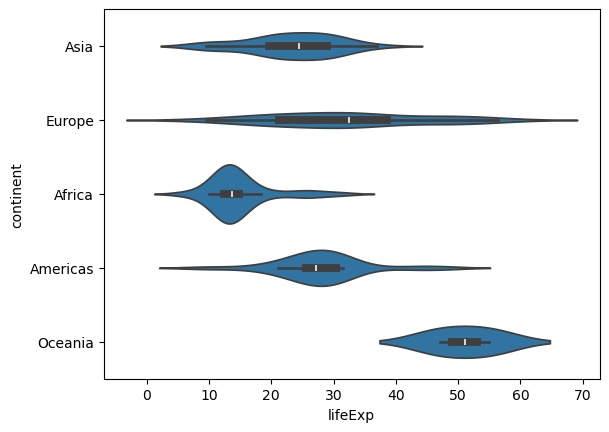

In [14]:
# 1. Make a box plot of life expectancy in 1918, with one box per contintent. 
# Try change it to a violon plot. Which do you prefer?
gap1918 = gapminder.loc[gapminder["year"]==1918, ]
sns.boxplot(x="lifeExp", y = "continent", data=gap1918)
plt.show()
sns.violinplot(x="lifeExp", y = "continent", data=gap1918)
plt.show()
# I prefer the boxplot, because I think it is easier to read. 
# The violin plots involves estimating a empirical (smooth) density function,
# while the box plot is only based on summary statistics of the data. 

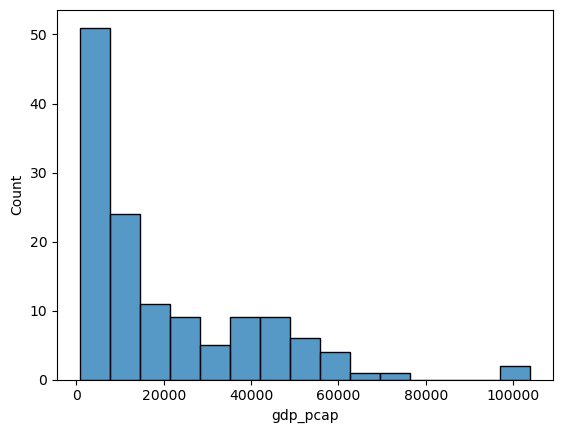

In [15]:
 #2. Make a histogram of GDP_per_capita for 2023.
sns.histplot(x = "gdp_pcap", data = gap23, bins = 15)
plt.show()

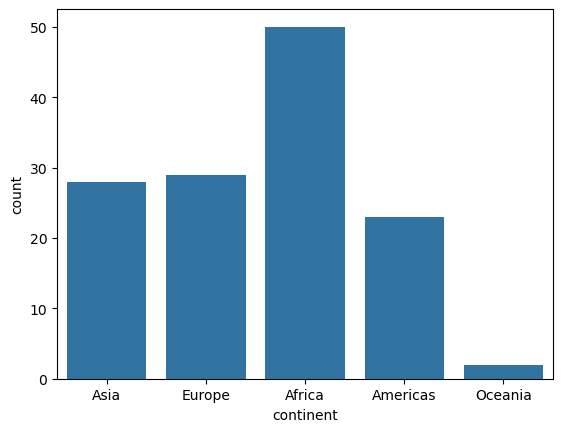

In [16]:
# 3. Make a bar plot showing how many countries are in each continent (use year 2023). 
sns.countplot(x = "continent", data =gap23)
plt.show()
# In the dataset, Asia and Europe have roughly the same number of countries, 
# Americas slightly fewer and Africa almost twice as many. Oceania has fewest. 


  continent           pop
0    Africa  1.466711e+09
1  Americas  6.899700e+08
2      Asia  4.434510e+09
3    Europe  5.573920e+08
4   Oceania  3.167000e+07


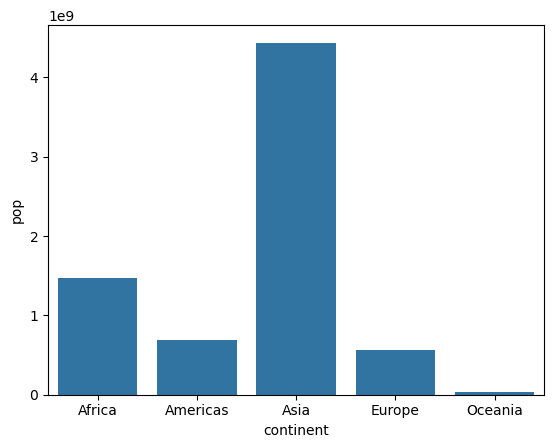

In [17]:
# 4. Make a bar plot showing the total population for each continent in 2023. 
# Compare it the bar plot in 3 and comment.
pop23 = gap23.groupby("continent")["pop"].sum().reset_index()
print(pop23)
sns.barplot(x = "continent",y="pop", data =pop23)
plt.show()
# Asia has roughly the same number of countries as Europe, but 9 times the population. 
# Africa is also quite populated, while Americas and Europe are not that far from eachother
# according to this dataset. 

### Challenge
Make the necessary changes to the data to obtain GDP per capita for each continent. Make a table showing the GDP per capita for each continent in 2023. Show the same data using a bar plot. Do you think the bar plot is a more effective way of communicating the data, or do you prefer the table?

  continent           gdp           pop      gdp_pcap
0    Africa  7.360571e+12  1.466711e+09   5018.419668
1  Americas  1.222834e+13  6.899700e+08  17723.003899
2      Asia  6.143138e+13  4.434510e+09  13853.024799
3    Europe  2.450827e+13  5.573920e+08  43969.542799
4   Oceania  1.597982e+12  3.167000e+07  50457.278181


C:\Users\s15052\AppData\Local\Temp\ipykernel_12768\3237834762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap23.loc[:, "gdp"]=gap23["gdp_pcap"]*gap23["pop"]


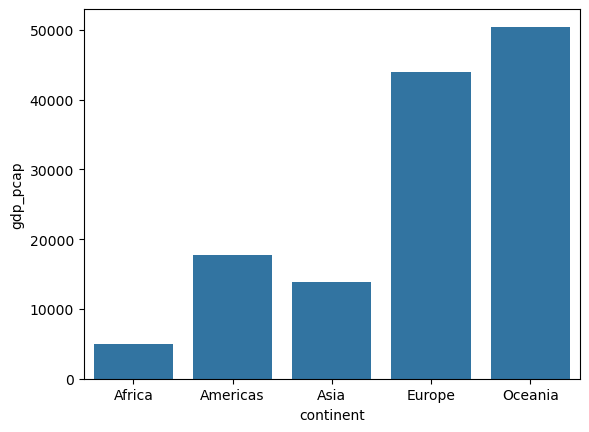

In [18]:
gap23.loc[:, "gdp"]=gap23["gdp_pcap"]*gap23["pop"]
continent_gdp = (
    gap23
    .groupby("continent", as_index=False)
    .agg(
        gdp=("gdp", "sum"),
        pop=("pop", "sum")
    )
)
continent_gdp["gdp_pcap"]=continent_gdp["gdp"]/continent_gdp["pop"]
print(continent_gdp.head())
sns.barplot(x = "continent",y="gdp_pcap", data =continent_gdp)
plt.show()

## Try to further explore visualizing the data using other graphical tools in your toolbox!